<a href="https://colab.research.google.com/github/rebeckakarras/Lab3/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from lab import run_experiment

In [44]:
import pandas as pd
import numpy as np
from numpy.random import rand
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
T = 30.1 #degrees
c = 1.9 * 10**(-3) #mol
run_experiment(T,c)

3.186500088836696

2-Level factorial design basis
Choosing a high and a low value
T_high = 40
T_low = 20
c_high = 3 mmol
c_low = 1 mmol
with 30.1 and 1.9 mmol as my centerpoints.


In [46]:
inputs_labels = {'A' : 'Temperature',
                 'B' : 'Concentration',
                 }

dat = [('A',25,40),
       ('B', 1.8 * 10**(-3),2.8*10**(-3)),
     ]

inputs_df = pd.DataFrame(dat,columns=['index','low','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,high,label
index,,,
A,25.0000,40.0000,Temperature
B,0.0018,0.0028,Concentration


In [47]:
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,25.0000,40.0000,Temperature,-1.0,1.0
B,0.0018,0.0028,Concentration,-1.0,1.0


In [48]:
import itertools
# we have four repetitions
encoded_inputs= list(itertools.product([-1,1],[-1,1]))
encoded = pd.DataFrame(encoded_inputs, columns=['T', 'c'])
encoded

,T,c
0,-1,-1
1,-1,1
2,1,-1
3,1,1


In [49]:
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Apply the decoding function to each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Create a new DataFrame with the decoded values
decoded_df = pd.DataFrame(decoded_experiments, columns=inputs_labels)
decoded_df.head()

,A,B
0,25.0,0.0018
1,25.0,0.0028
2,40.0,0.0018
3,40.0,0.0028


In [50]:
#orginal data
results = []
for T,c in decoded_experiments:
  Result = run_experiment(T,c)
  results.append(Result)

resultsorg = pd.DataFrame(results, columns=["y1"])
resultsorg

,y1
0,0.222443
1,0.222490
2,4.252625
3,4.254446


In [51]:
import pandas as pd
import itertools
import random
center_T = 30.1  # center temperature chosen from the given value
center_c = 1.9 * 10**(-3)  # center concentration chosen from the given value
results_df = pd.DataFrame()

# Define the decode_input function from the encoded inputs
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Decode the values for each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Initialize results list
generated_data = []
# Number of repetitions for each encoded input
num_repetitions = 1

# Loop through each encoded input
for encoded_input in encoded_inputs:
    # Decode to get base values
    low_T, high_T = inputs_df.iloc[0]['low'], inputs_df.iloc[0]['high']
    low_c, high_c = inputs_df.iloc[1]['low'], inputs_df.iloc[1]['high']

    # Decode the current encoded input to get the low or high value
    T_decoded, c_decoded = decode_input(encoded_input, inputs_df)

    # Generate matching values multiple times
    for _ in range(num_repetitions):
        # Randomize T based on whether it is decoded to low or high
        if T_decoded == low_T:
            # Randomize a value below center_T
            T_randomized = random.uniform(low_T, center_T)
        else:
            # Randomize a value above center_T
            T_randomized = random.uniform(center_T, high_T)

        # Randomize c based on whether it is decoded to low or high
        if c_decoded == low_c:
            # Randomize a value below center_c
            c_randomized = random.uniform(low_c, center_c)
        else:
            # Randomize a value above center_c
            c_randomized = random.uniform(center_c, high_c)

        # Append generated data to the list (T_randomized, c_randomized, and encoded_input)
        Result = run_experiment(T_randomized, c_randomized)
        results.append(Result) # Run the experiment with these values

        #results_df = pd.DataFrame(results, columns=[f'y{_+1}' for i in range(num_repetitions)])

        #generated_data.append((T_randomized, c_randomized, Result))
        #generated_data_df = pd.DataFrame(generated_data, columns=['T', 'c',])
# Convert generated data to a DataFrame for better organization


# Display the generated values
#print(generated_data_df)


In [52]:
combined_output = pd.concat([encoded, resultsorg], axis=1)
combined_output

,T,c,y1
0,-1,-1,0.222443
1,-1,1,0.222490
2,1,-1,4.252625
3,1,1,4.254446


In [53]:
labels = ['T','c']

main_effects = {}
rep=1
for j in range(0,rep):
    index=j+1
    for key in labels:
        effects = combined_output.groupby(key)['y'+str(index)].mean()
        main_effects[j,key] = sum( [i*effects[i] for i in [-1,1]])

print('Main effects')
print(main_effects)

average_main_effects = {}
#this will be similar due to only two factors are used.
print('Average main effects')
for key in labels:
        average_effects = combined_output.groupby(key)['y1'].mean()
        average_main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(average_main_effects)

Main effects
{(0, 'T'): 4.031069343566422, (0, 'c'): 0.0009343709112084042}
Average main effects
{'T': 4.031069343566422, 'c': 0.0009343709112084042}


In [54]:
import itertools

twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:

    effects = combined_output.groupby([key[0],key[1]])['y1'].mean()

    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('T', 'c'): 0.0008866108947875873}

In [55]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append(abs(average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)

effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cummunalitive percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cummunalitive percentage
T,4.031069,99.95
c,0.000934,99.98
"(T, c)",0.000887,100.00


Text(0.5, 1.0, 'y1')

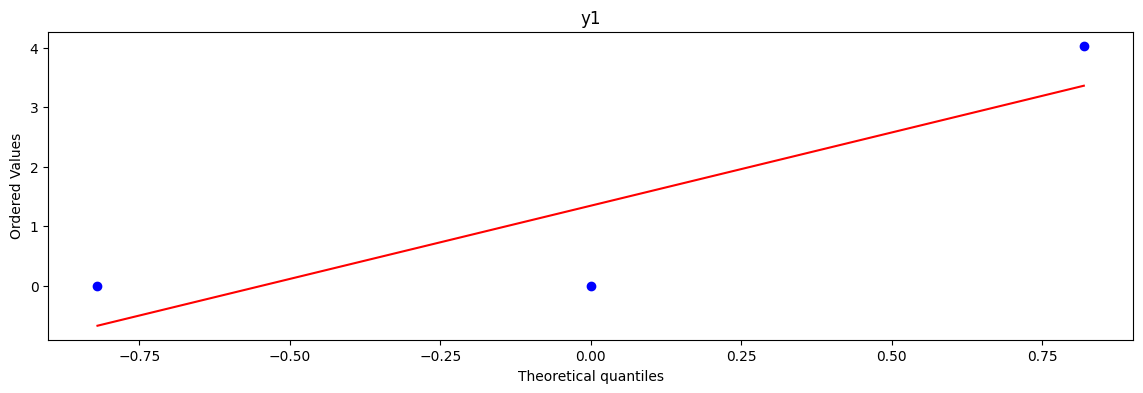

In [56]:
from matplotlib.pyplot import *
import scipy.stats as stats
fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

stats.probplot(effects_df["Standardized effect"], dist="norm", plot=ax1)
ax1.set_title('y1')

In [57]:
s = "yhat = "

s += "%0.3f "%(combined_output['y1'].mean())

for i,k in enumerate(average_main_effects.keys()):
    if(average_main_effects[k]<0):
        s += "%0.3f %s "%( average_main_effects[k]/2.0, k )
    else:
        s += "+ %0.3f %s "%( average_main_effects[k]/2.0, k )

for i,k in enumerate(twoway_effects.keys()):
    if(twoway_effects[k]<0):
        s += " %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])
    else:
        s += "+ %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])

print(s)

yhat = 2.238 + 2.016 T + 0.000 c + 0.000 T c


In [58]:
sigmasquared = 0.0050
k = len(inputs_df.index)
Vmean = (sigmasquared)/(2**k)
Veffect = (4*sigmasquared)/(2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.001250
Variance in effects: 0.005000


In [59]:
sigmasquared = 0.0050
r=4
k = len(inputs_df.index)
Vmean = (sigmasquared)/(r*2**k)
Veffect = (4*sigmasquared)/(r*2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000313
Variance in effects: 0.001250


In [60]:
print(np.sqrt(Vmean))
print(np.sqrt(Veffect))

0.017677669529663688
0.035355339059327376


In [61]:
#no noise hence the perfect results.
y1 = combined_output['y1']
xlabs=['T','c']
x = combined_output[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='y1 ~ T + c + T:c', data=combined_output).fit()

res1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normal

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        13:18:14   Log-Likelihood:                 132.91
No. Observations:                   4   AIC:                            -257.8
Df Residuals:                       0   BIC:                            -260.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2380        inf          0        nan         nan         nan
T              2.0155        inf          0        nan         nan         nan
c              0.0005        inf          0        nan         nan         nan
T:c            0.0004        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.901
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.651
Skew:                           0.018   Prob(JB):                        0.722
Kurtosis:                       1.023   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
res2 = smf.ols(formula='y1 ~ c + T + T:c + I(T**2) + I(c**2)', data=combined_output).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        13:18:14   Log-Likelihood:                 131.96
No. Observations:                   4   AIC:                            -255.9
Df Residuals:                       0   BIC:                            -258.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7460        inf          0        n

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normal

Optimization

In [63]:
inputs_labels = {'A' : 'Temperature',
                 'B' : 'Concentration',
                 }

dat = [('A',25.1,30.1,35.1),
       ('B', 1.5 * 10**(-3),2*10**(-3),2.5*10**(-3)),
     ]

inputs_df = pd.DataFrame(dat,columns=['index','low','center','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,center,high,label
index,,,,
A,25.1000,30.100,35.1000,Temperature
B,0.0015,0.002,0.0025,Concentration


In [64]:
# compute averages and span
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

# encode the data
inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_center'] = inputs_df.apply( lambda z : ( z['center'] - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,center,high,label,encoded_low,encoded_center,encoded_high
index,,,,,,,
A,25.1000,30.100,35.1000,Temperature,-1.0,0.0,1.0
B,0.0015,0.002,0.0025,Concentration,-1.0,0.0,1.0


In [65]:
import itertools
encoded_inputs= list(itertools.product([-1,1],[-1,1]))
encoded_inputs
for i in range(0,5):
    encoded_inputs.append((0,0))
encoded_inputs

[(-1, -1), (-1, 1), (1, -1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]

In [66]:
results=pd.DataFrame(encoded_inputs)
results=results[results.columns[::-1]]
results.columns=['A','B']
results

,A,B
0,-1,-1
1,1,-1
2,-1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0


In [67]:
def parse_values(x):
    if x < 2:
       return x * 10
    elif x < 4:
       return x ** 2
    else:
       return x + 10

real_experiment = results
var_labels = []
for var in ['A','B']:
    var_label = inputs_df.loc[var]['label']
    var_labels.append(var_label)
    real_experiment[var_label] = results.apply(
        lambda z : inputs_df.loc[var]['low'] if z[var]<0 else (inputs_df.loc[var]['high'] if z[var]>0 else inputs_df.loc[var]['center']), axis=1)


real_experiment[var_labels]

,Temperature,Concentration
0,25.1,0.0015
1,35.1,0.0015
2,25.1,0.0025
3,35.1,0.0025
4,30.1,0.0020
5,30.1,0.0020
6,30.1,0.0020
7,30.1,0.0020
8,30.1,0.0020


In [68]:
#need to randomize values for the centerpoints
import random
experiment_results = []
for T, c in zip(real_experiment['Temperature'], real_experiment['Concentration']):
    if T == 30.1 and c == 0.002:
          T_randomize = random.uniform(30,30.2)
          c_randomize = random.uniform(0.0018,0.0021)
          Result = run_experiment(T_randomize, c_randomize)
          experiment_results.append(Result)
    else:
      Result = run_experiment(T, c)
      experiment_results.append(Result)

resultsorg = pd.DataFrame(experiment_results, columns=["y1"])
resultsorg

,y1
0,0.240858
1,4.225508
2,0.240909
3,4.226777
4,3.115834
5,3.232283
6,3.182940
7,3.182858
8,3.128711


In [69]:
df = pd.concat([results,resultsorg], axis=1)
df

,A,B,Temperature,Concentration,y1
0,-1,-1,25.1,0.0015,0.240858
1,1,-1,35.1,0.0015,4.225508
2,-1,1,25.1,0.0025,0.240909
3,1,1,35.1,0.0025,4.226777
4,0,0,30.1,0.0020,3.115834
5,0,0,30.1,0.0020,3.232283
6,0,0,30.1,0.0020,3.182940
7,0,0,30.1,0.0020,3.182858
8,0,0,30.1,0.0020,3.128711


In [70]:
df2 = pd.DataFrame(df,columns=['A','B','y1'])

df2

,A,B,y1
0,-1,-1,0.240858
1,1,-1,4.225508
2,-1,1,0.240909
3,1,1,4.226777
4,0,0,3.115834
5,0,0,3.232283
6,0,0,3.182940
7,0,0,3.182858
8,0,0,3.128711


In [71]:
labels = ['A','B']
ybar = df['y1'].mean()
print(ybar)

main_effects = {}

print('main effects')
for key in labels:
        average_effects = df.groupby(key)['y1'].mean()
        main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(main_effects)

2.752964317246546
main effects
{'A': 3.9852592144811876, 'B': 0.0006603431166518625}


In [72]:
y1 = df['y1']
xlabs=['A','B']
x = df[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='y1 ~ A + B + A:B', data=df).fit()

res1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     13.56
Date:                Mon, 07 Oct 2024   Prob (F-statistic):            0.00775
Time:                        13:18:15   Log-Likelihood:                -5.8919
No. Observations:                   9   AIC:                             19.78
Df Residuals:                       5   BIC:                             20.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7530      0.208     13.219      0.000       2.218       3.288
A              1.9926      0.312      6.379      0.001       1.190       2.796
B              0.0003      0.312      0.001      0.999      -0.803       0.803
A:B            0.0003      0.312      0.001      0.999      -0.803       0.803
==============================================================================
Omnibus:                        8.860   Durbin-Watson:                   0.409
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                1.474
Skew:                          -0.210   Prob(JB):                        0.479
Kurtosis:                       1.062   Cond. No.                         1.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
est1 = sm.OLS(y1,x).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     24.41
Date:                Mon, 07 Oct 2024   Prob (F-statistic):            0.00131
Time:                        13:18:15   Log-Likelihood:                -5.8919
No. Observations:                   9   AIC:                             17.78
Df Residuals:                       6   BIC:                             18.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7530      0.190     14.481      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [74]:
twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:

    effects = df.groupby([key[0],key[1]])['y1'].mean()

    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('A', 'B'): 0.0006086201336161778}

model: 2.96 + 4.2A + 0.0016B + 0.001622AB

Steepest ascent
1/4.2 = B/0.0016, B = 0.00003

In [75]:
B = main_effects['B']/main_effects['A']
B

0.00016569640294723662

In [76]:
Origin = [25.1,0]
delta= [1.0,B]
march=[]
for i in range(0,15):
    march.append((Origin[0]+(i+1)*delta[0],Origin[1]+(i+1)*delta[1]))

March=pd.DataFrame(march,columns=['T', 'c'])
March

,T,c
0,26.1,0.000166
1,27.1,0.000331
2,28.1,0.000497
3,29.1,0.000663
4,30.1,0.000828
5,31.1,0.000994
6,32.1,0.001160
7,33.1,0.001326
8,34.1,0.001491
9,35.1,0.001657


In [77]:
steep = []
for T, c in zip(March['T'], March['c']):
  Result2 = run_experiment(T, c)
  steep.append(Result2)
steepascent = pd.DataFrame(steep, columns=["y2"])
steepascent


,y2
0,0.502329
1,0.938658
2,1.571690
3,2.360349
4,3.185757
5,3.880912
6,4.304933
7,4.423387
8,4.336884
9,4.225708


In [78]:
import numpy as np
import pandas as pd

# Define initial values and step sizes
Origin = [25.1, 0]  # Initial values for T and c
delta = [1.0, B]  # Step sizes for T and c
max_iterations = 100  # Maximum number of iterations
iteration = 0

march = []
results = []

# Initial values
T, c = Origin

# Run the first experiment to get the initial result
Result2 = run_experiment(T, c)
results.append(Result2)
march.append((T, c))

# Define the improvement condition (to keep track of when to stop)
improvement = float('inf')

# Define the while loop for steepest ascent
while improvement > 0 and iteration < max_iterations:


    # Generate new points for T and c based on the delta values
    T_new = T + delta[0]
    c_new = c + delta[1]

    # Run the experiment with the new values
    new_result = run_experiment(T_new, c_new)

    # Save the new results
    march.append((T_new, c_new))
    results.append(new_result)

    # Calculate the improvement (difference between current and previous result)
    improvement = new_result - results[-2]

    # If the improvement is positive, continue with new values
    if improvement > 0:
        T, c = T_new, c_new
        iteration += 1
    else:
        # no further improvement, stop the loop
        break

# After the loop, create a DataFrame of the results
March_df = pd.DataFrame(march, columns=['T', 'c'])
results_df = pd.DataFrame(results, columns=["y2"])

print(f"Steepest ascent finished in {iteration} iterations.")
print("Optimal values of T and c:", T, c)
print("Maximum value of y2:", results[-1])

Steepest ascent finished in 8 iterations.
Optimal values of T and c: 33.1 0.0013255712235778932
Maximum value of y2: 4.3368838931959734


Text(0, 0.5, 'Yield')

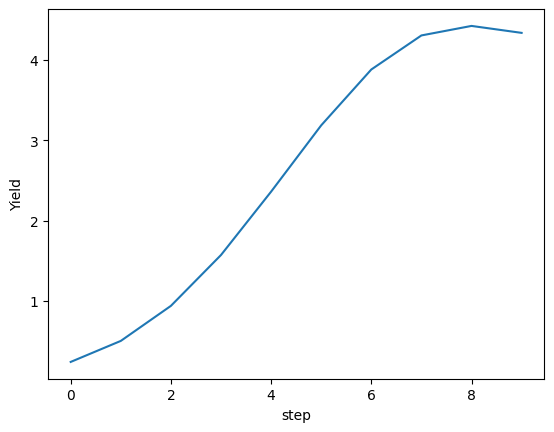

In [79]:
ax=results_df['y2'].plot()
ax.set_xlabel("step")
ax.set_ylabel("Yield")

In [80]:
#need to randomize values for the centerpoints
import pandas as pd
import itertools
import random
center_T = 30.1  # center temperature chosen from the given value
center_c = 1.9 * 10**(-3)  # center concentration chosen from the given value
results_df = pd.DataFrame()

# Define the decode_input function from the encoded inputs
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Decode the values for each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Initialize results list
generated_data = []
# Number of repetitions for each encoded input
num_repetitions = 1

# Loop through each encoded input
for encoded_input in encoded_inputs:
    # Decode to get base values
    low_T, high_T = inputs_df.iloc[0]['low'], inputs_df.iloc[0]['high']
    low_c, high_c = inputs_df.iloc[1]['low'], inputs_df.iloc[1]['high']

    # Decode the current encoded input to get the low or high value
    T_decoded, c_decoded = decode_input(encoded_input, inputs_df)

    # Generate matching values multiple times
    for _ in range(num_repetitions):
        # Randomize T based on whether it is decoded to low or high
        if T_decoded == low_T:
            # Randomize a value below center_T
            T_randomized = random.uniform(low_T, center_T)
        else:
            # Randomize a value above center_T
            T_randomized = random.uniform(center_T, high_T)

        # Randomize c based on whether it is decoded to low or high
        if c_decoded == low_c:
            # Randomize a value below center_c
            c_randomized = random.uniform(low_c, center_c)
        else:
            # Randomize a value above center_c
            c_randomized = random.uniform(center_c, high_c)

        # Append generated data to the list (T_randomized, c_randomized, and encoded_input)
        Result = run_experiment(T_randomized, c_randomized)
        print(Result)
        #results.append(Result) # Run the experiment with these values

        #results_df = pd.DataFrame(results, columns=[f'y{_+1}' for i in range(num_repetitions)])

        #generated_data.append((T_randomized, c_randomized, Result))
        #generated_data_df = pd.DataFrame(generated_data, columns=['T', 'c',])
# Convert generated data to a DataFrame for better organization


# Display the generated values
#print(generated_data_df)

1.594324081869251
0.6960597401270473
4.29183349211972
4.420816006140357
4.2874001304447615
4.394609957401488
3.9515932874230377
4.248137418879134
4.399087387545892
